In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
assessments = pd.read_csv('assessments.csv')
assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [3]:
courses = pd.read_csv('courses.csv')
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [4]:
studentAssessment = pd.read_csv('studentAssessment.csv')
studentAssessment

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [5]:
studentInfo = pd.read_csv('studentInfo.csv')
studentInfo

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [6]:
studentRegistration = pd.read_csv('studentRegistration.csv')
studentRegistration

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [7]:
vle = pd.read_csv('vle.csv')
vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [8]:
studentVle = pd.read_csv('studentVle.csv')
studentVle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [9]:
#group studentAssessment by id_student and reset index

studentAssessment_group = studentAssessment[['id_student','score']].groupby('id_student').agg({'score':['mean','min','max']})
studentAssessment_group.columns = ['mean','min', 'max']
studentAssessment_group = studentAssessment_group.reset_index()

In [10]:
#check for null values within dataframe
studentAssessment_group[['mean','min','max']].isnull().values.any()

True

In [11]:
#fill null values with median, axis = 1 for columns

studentAssessment_group = studentAssessment_group.fillna(studentAssessment_group.median())
studentAssessment_group.isnull().values.any()
studentAssessment_group

,id_student,mean,min,max
0,6516,61.800000,48.0,77.0
1,8462,87.000000,83.0,93.0
2,11391,82.000000,78.0,85.0
3,23629,82.500000,63.0,100.0
4,23698,74.444444,56.0,94.0
...,...,...,...,...
23364,2698251,58.142857,36.0,76.0
23365,2698257,67.800000,58.0,76.0
23366,2698535,39.250000,13.0,62.0
23367,2698577,64.400000,54.0,100.0


In [12]:
studentAssessment_group.to_csv('studentAssessment_group.csv')

In [13]:
#group by code_module, code_presentation, id_student
studentVle_group = studentVle[['code_module', 'code_presentation','id_student','sum_click']].groupby(['code_module', 'code_presentation','id_student']).sum()
studentVle_group

sum_click
code_module code_presentation id_student           
AAA         2013J             11391             934
                              28400            1435
                              30268             281
                              31604            2158
                              32885            1034
...                                             ...
GGG         2014J             2640965            41
                              2645731           893
                              2648187           312
                              2679821           275
                              2684003           616

[29228 rows x 1 columns]

In [14]:
studentVle_group = studentVle_group.reset_index()
studentVle_group

,code_module,code_presentation,id_student,sum_click
0,AAA,2013J,11391,934
1,AAA,2013J,28400,1435
2,AAA,2013J,30268,281
3,AAA,2013J,31604,2158
4,AAA,2013J,32885,1034
...,...,...,...,...
29223,GGG,2014J,2640965,41
29224,GGG,2014J,2645731,893
29225,GGG,2014J,2648187,312
29226,GGG,2014J,2679821,275


In [15]:
#fills missing values with 'Missing'. It is important to specify in place

studentInfo.fillna('Missing', inplace = True)
studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              32593 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [16]:
unique_id = pd.DataFrame(studentInfo['id_student'].unique())
unique_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28785 entries, 0 to 28784
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       28785 non-null  int64
dtypes: int64(1)
memory usage: 225.0 KB


In [17]:
#to drop duplicates, use subset option within method, and not the subset the dataframe

studentInfo = studentInfo.drop_duplicates(subset = 'id_student')
studentInfo

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [18]:
studentInfo_Vle = pd.merge(studentInfo, studentVle_group, how = 'left', on = ['code_module', 'code_presentation', 'id_student'])
studentInfo_Vle

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1435.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,281.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2158.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1034.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28780,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,41.0
28781,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,893.0
28782,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,312.0
28783,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,275.0


In [19]:
studentInfo_Vle_Scores = pd.merge(studentInfo_Vle, studentAssessment_group,  how = 'left', on = ['id_student'])
studentInfo_Vle_Scores

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,mean,min,max
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0,82.000000,78.0,85.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1435.0,66.400000,60.0,70.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,281.0,NaN,NaN,NaN
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2158.0,76.000000,71.0,88.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1034.0,54.400000,30.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28780,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,41.0,NaN,NaN,NaN
28781,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,893.0,88.111111,72.0,100.0
28782,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,312.0,76.666667,60.0,100.0
28783,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,275.0,91.500000,83.0,100.0


In [20]:
studentInfo_Vle_Scores = studentInfo_Vle_Scores.fillna(studentInfo_Vle_Scores.median())
studentInfo_Vle_Scores

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,mean,min,max
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0,82.000000,78.0,85.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1435.0,66.400000,60.0,70.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,281.0,76.000000,59.0,94.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2158.0,76.000000,71.0,88.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1034.0,54.400000,30.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28780,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,41.0,76.000000,59.0,94.0
28781,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,893.0,88.111111,72.0,100.0
28782,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,312.0,76.666667,60.0,100.0
28783,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,275.0,91.500000,83.0,100.0


In [21]:
studentInfo_Vle_Scores.to_csv('studentInfo_Vle_Scores.csv')

[Text(0, 0.5, 'No. of Students'), Text(0.5, 0, 'Module Code')]

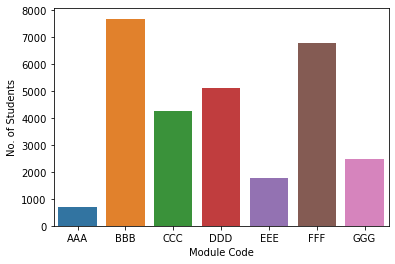

In [22]:
ax = sns.countplot(studentInfo_Vle_Scores['code_module'])
ax.set(xlabel = 'Module Code', ylabel = 'No. of Students')

[Text(0, 0.5, 'No. of Students'), Text(0.5, 0, 'Gender')]

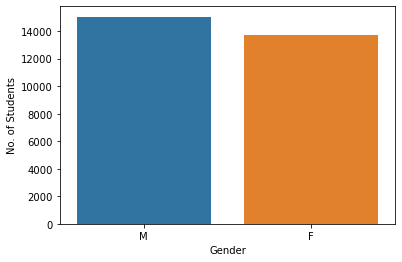

In [23]:
ax1 = sns.countplot(studentInfo_Vle_Scores['gender'])
ax1.set(xlabel = 'Gender', ylabel = 'No. of Students')

[Text(0, 0.5, 'No. of Students'), Text(0.5, 0, 'Region')]

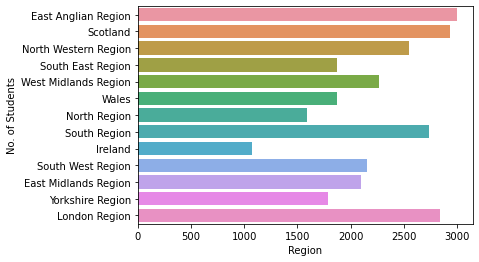

In [24]:
ax2 = sns.countplot(y = 'region', data = studentInfo_Vle_Scores, orient = 'v')
ax2.set(xlabel = 'Region', ylabel = 'No. of Students')

[Text(0, 0.5, 'No. of Students'), Text(0.5, 0, 'Highest Education')]

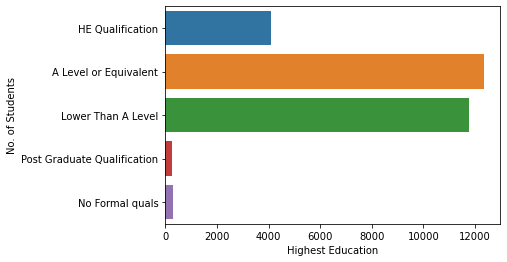

In [25]:
ax3 = sns.countplot(y = 'highest_education', data = studentInfo_Vle_Scores, orient = 'v')
ax3.set(xlabel = 'Highest Education', ylabel = 'No. of Students')

[Text(0, 0.5, 'No. of Students'), Text(0.5, 0, 'IMD Band')]

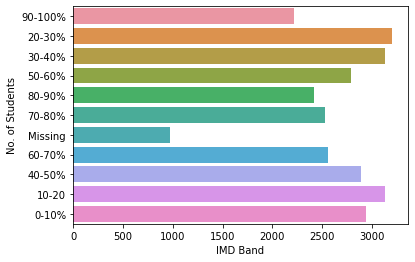

In [26]:
ax4 = sns.countplot(y = 'imd_band', data = studentInfo_Vle_Scores, orient = 'v')
ax4.set(xlabel = 'IMD Band', ylabel = 'No. of Students')

[Text(0, 0.5, 'No. of Students'), Text(0.5, 0, 'Age Band')]

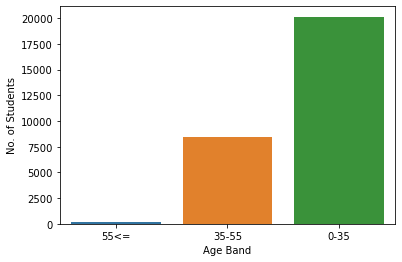

In [27]:
ax5 = sns.countplot(x = 'age_band', data = studentInfo_Vle_Scores, orient = 'v')
ax5.set(xlabel = 'Age Band', ylabel = 'No. of Students')

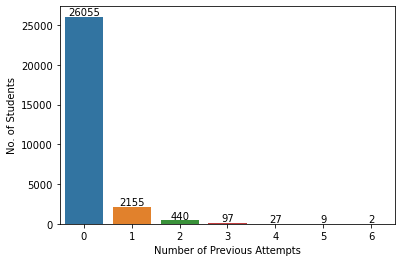

In [28]:
ax6 = sns.countplot(studentInfo_Vle_Scores['num_of_prev_attempts'])
ax6.set(xlabel = 'Number of Previous Attempts', ylabel = 'No. of Students')

#label through the list of axes patches
for p in ax6.patches:
    height = p.get_height() #get the height of each bar
    #adding text to each bar
    ax6.text(x = p.get_x() + (p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
            y = height + 200, # y-coordinate position of data label, padded 0.2 above bar
            s = '{:.0f}'.format(height), # data label formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center

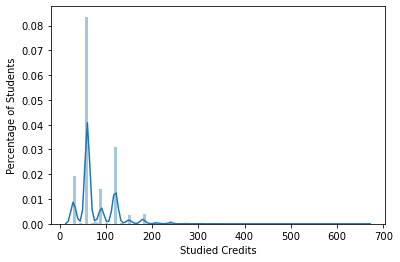

In [29]:
ax7 = sns.distplot(studentInfo_Vle_Scores['studied_credits'], 
                   bins = 100)

ax7.set(xlabel = 'Studied Credits', 
        ylabel = 'Percentage of Students')

#label through the list of axes patches
for p in ax7.patches:
    height = p.get_height() #get the height of each bar
    #adding text to each bar
    ax6.text(x = p.get_x() + (p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
            y = height + 200, # y-coordinate position of data label, padded 200 above bar
            s = '{:.0f}'.format(height), # data label formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center

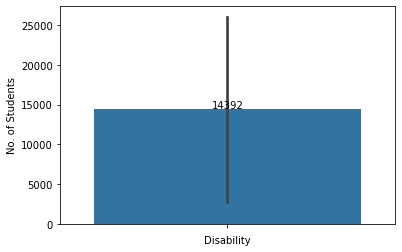

In [30]:
ax8 = sns.barplot(studentInfo_Vle_Scores['disability'].value_counts(), orient = 'v')

ax8.set(xlabel = 'Disability', 
        ylabel = 'No. of Students')

#label through the list of axes patches
for p in ax8.patches:
    height = p.get_height() #get the height of each bar
    #adding text to each bar
    ax8.text(x = p.get_x() + (p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
            y = height + 200, # y-coordinate position of data label, padded 200 above bar
            s = '{:.0f}'.format(height), # data label formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center

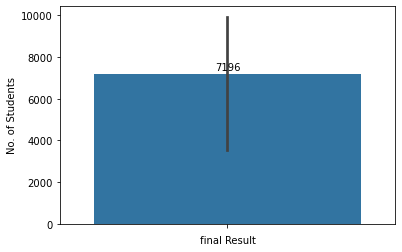

In [31]:
ax9 = sns.barplot(studentInfo_Vle_Scores['final_result'].value_counts(), orient = 'v')

ax9.set(xlabel = 'final Result', 
        ylabel = 'No. of Students')

#label through the list of axes patches
for p in ax9.patches:
    height = p.get_height() #get the height of each bar
    #adding text to each bar
    ax9.text(x = p.get_x() + (p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
            y = height + 200, # y-coordinate position of data label, padded 200 above bar
            s = '{:.0f}'.format(height), # data label formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center

[Text(0, 0.5, 'Percentage of Students'), Text(0.5, 0, 'Total No. of Clicks')]

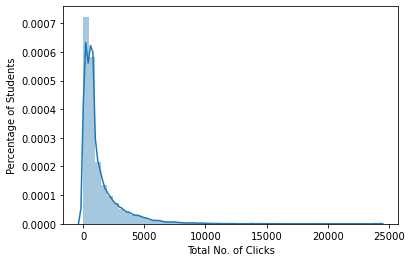

In [38]:
ax10 = sns.distplot(studentInfo_Vle_Scores['sum_click'])

ax10.set(xlabel = 'Total No. of Clicks', 
        ylabel = 'Percentage of Students')

[Text(0, 0.5, 'Percentage of Students'), Text(0.5, 0, 'Mean Score')]

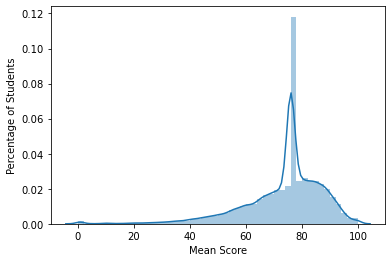

In [41]:
ax11 = sns.distplot(studentInfo_Vle_Scores['mean'])

ax11.set(xlabel = 'Mean Score', 
        ylabel = 'Percentage of Students')

[Text(0, 0.5, 'Percentage of Students'), Text(0.5, 0, 'Max Score')]

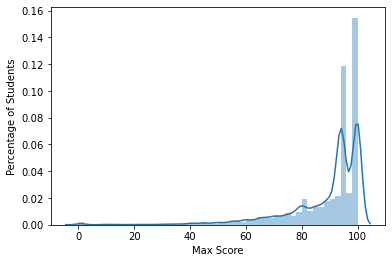

In [40]:
ax12 = sns.distplot(studentInfo_Vle_Scores['max'])

ax12.set(xlabel = 'Max Score', 
        ylabel = 'Percentage of Students')

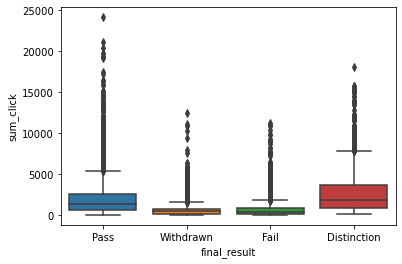

In [48]:
ax13 = sns.boxplot(y = 'sum_click', x = 'final_result', data = studentInfo_Vle_Scores)

for p in ax13.patches:
    height = p.get_height()
    x = p.get_x() + (p.get_width() /2),
    y = height + 200,
    s = '{:.0f}'.format(height),
    ha = 'center'

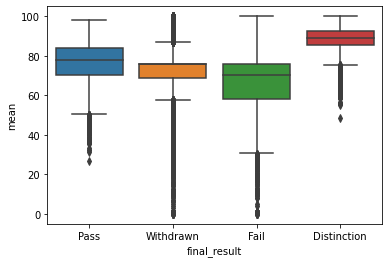

In [49]:
ax14 = sns.boxplot(y = 'mean', x = 'final_result', data = studentInfo_Vle_Scores)

for p in ax14.patches:
    height = p.get_height()
    x = p.get_x() + (p.get_width() /2),
    y = height + 200,
    s = '{:.0f}'.format(height),
    ha = 'center'

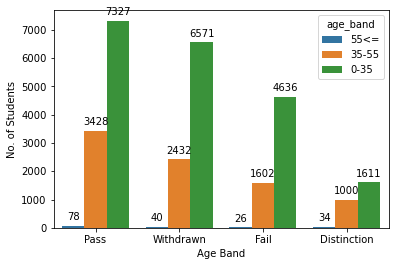

In [59]:
ax15 = sns.countplot(x = 'final_result', data = studentInfo_Vle_Scores, hue = 'age_band')
ax15.set(xlabel = 'Age Band', ylabel = 'No. of Students')

for p in ax15.patches:
    height = p.get_height()
    ax15.text(x = p.get_x() + (p.get_width() /2),
              y = height + 200,
              s = '{:.0f}'.format(height),
              ha = 'center')
    

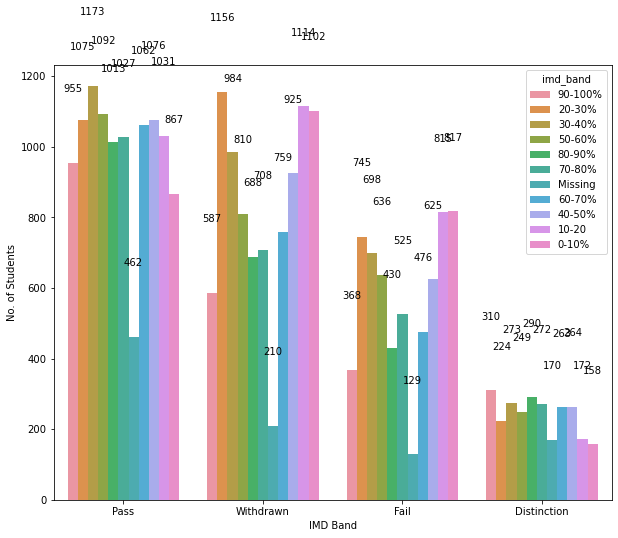

In [84]:
fig, ax16 = plt.subplots(figsize = (10, 8))
sns.countplot(ax = ax16, x = 'final_result', data = studentInfo_Vle_Scores, hue = 'imd_band')
ax16.set(xlabel = 'IMD Band', ylabel = 'No. of Students')

for p in ax16.patches:
    height = p.get_height()
    ax16.text(x = p.get_x() + (p.get_width() /2),
              y = height + 200,
              s = '{:.0f}'.format(height),
              ha = 'center')

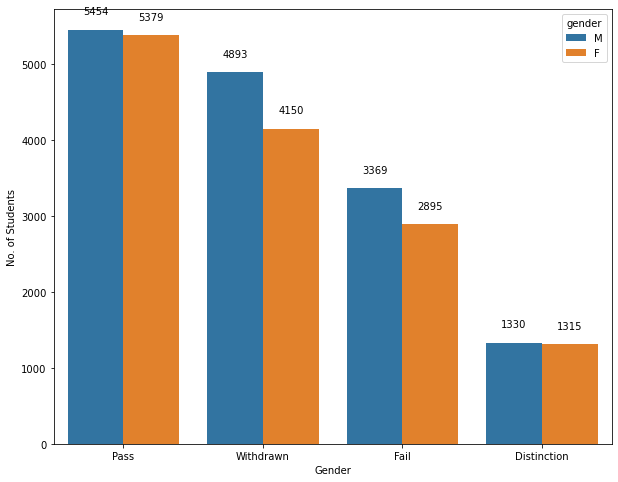

In [86]:
fig, ax17 = plt.subplots(figsize = (10, 8))
sns.countplot(ax = ax17, x = 'final_result', data = studentInfo_Vle_Scores, hue = 'gender')
ax17.set(xlabel = 'Gender', ylabel = 'No. of Students')

for p in ax17.patches:
    height = p.get_height()
    ax17.text(x = p.get_x() + (p.get_width() /2),
              y = height + 200,
              s = '{:.0f}'.format(height),
              ha = 'center')

In [95]:
studentInfo_Vle_Scores['age_band'] = studentInfo_Vle_Scores['age_band'].replace('55<=','55+')
studentInfo_Vle_Scores

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,mean,min,max
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55+,0,240,N,Pass,934.0,82.000000,78.0,85.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1435.0,66.400000,60.0,70.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,281.0,76.000000,59.0,94.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2158.0,76.000000,71.0,88.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1034.0,54.400000,30.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28780,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,41.0,76.000000,59.0,94.0
28781,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,893.0,88.111111,72.0,100.0
28782,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,312.0,76.666667,60.0,100.0
28783,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,275.0,91.500000,83.0,100.0
